In [64]:
import numpy as np
from scipy.stats import norm

# Given values for edge e_k
psi = np.array([1.0,4.5,7.0])  # Means
tau = np.array([0.9,1.0,0.85])  # Variances

# Calculate a_ti values
a_ti = np.sum(tau) / tau
# Calculate w_ti values
w_ti = a_ti / np.sum(a_ti)

# Compute the Gaussian mixture for the edge
x_values = np.linspace(min(psi) - 3*max(tau), max(psi) + 3*max(tau), 400)
Psi_k = np.zeros_like(x_values)

for i in range(len(psi)):
    Psi_k += w_ti[i] * norm.pdf(x_values, psi[i], np.sqrt(tau[i]))

0.9999999999999998


In [70]:
# Check that each Gaussian is normalized
gaussian_sums = []

for i in range(len(psi)):
    gaussian = w_ti[i] * norm.pdf(x_values, psi[i], np.sqrt(tau[i]))
    integral_approx = np.trapz(gaussian, x_values)
    gaussian_sums.append(integral_approx)

# Approximate the integral of the Gaussian mixture
integral_approx = np.trapz(Psi_k, x_values)


print(gaussian_sums)
print(integral_approx)

[0.33797216699798455, 0.30417495029821073, 0.35785288270377164]
0.9999999999999669


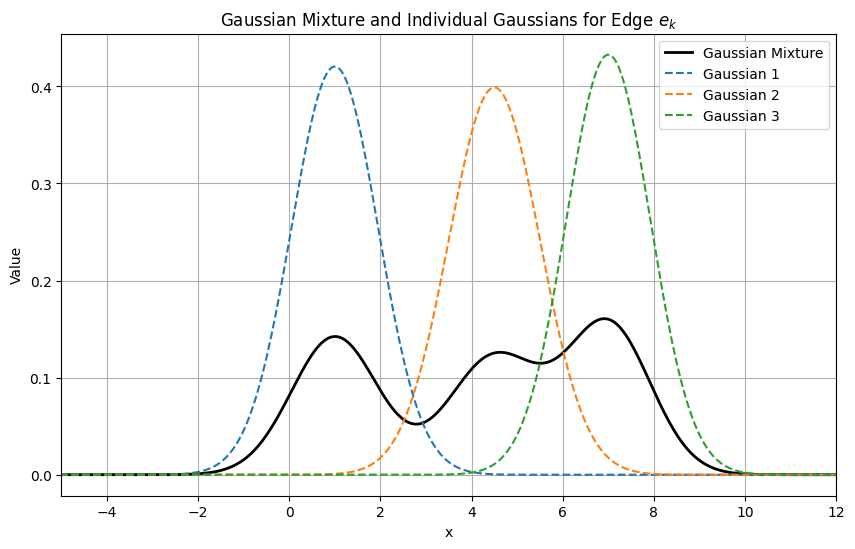

In [69]:
# Plotting the Gaussian mixture along with individual Gaussians
plt.figure(figsize=(10, 6))
plt.plot(x_values, Psi_k, label='Gaussian Mixture', color='black', linewidth=2)

# Plotting individual Gaussians
for i in range(len(psi)):
    gaussian =  norm.pdf(x_values, psi[i], np.sqrt(tau[i]))
    plt.plot(x_values, gaussian, label=f'Gaussian {i+1}', linestyle='--')

plt.title('Gaussian Mixture and Individual Gaussians for Edge $e_k$')
plt.xlabel('x')
plt.xlim(-5, 12)
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
